In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress
from scipy.stats import entropy

# Preliminary
Populating data tables

In [2]:
def lin_with_noise(x, slope=1, intercept=0, ratio=1, dist='normal', loc=0, scale=1):
    if dist == 'normal':
        y = slope * x + ratio * slope * np.random.normal(loc=loc, scale=scale, size=len(x)) + intercept
    elif dist == 'uniform':
        low = loc - 0.5 * scale;
        high = loc + 0.5 * scale;
        y = slope * x + ratio * slope * np.random.uniform(low=low, high=high, size=len(x)) + intercept;
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
    return y

0.940479800879
1.90562468244
0.78229020653


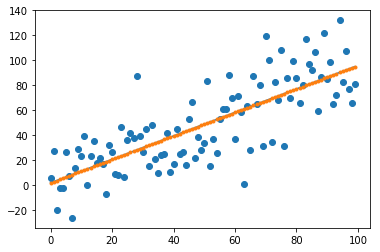

In [72]:
x = np.arange(100)
y = lin_with_noise(x, ratio=2, dist='normal', scale=10)

p = np.polyfit(x, y, 1)
q = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, (np.poly1d(p))(x))
plt.plot(x, q.slope * x + q.intercept, '.')
print(q.slope)
print(q.intercept)
print(q.rvalue)

In [3]:
samples = np.array([3, 4, 5, 6, 7, 8, 9,\
          10, 12, 14, 16, 18,\
          20, 25, 30, 40, 50,\
          100])
ratios = np.array([0.1, 0.2, 0.4, 0.6, 0.8,\
          1, 2, 4, 6, 8,\
          10])
scales = np.array([0.1, 0.2, 0.4, 0.6, 0.8,\
          1, 2, 4, 6, 8,\
          10])

rsq_mins = np.array([0.0, 0.02, 0.04, 0.06, 0.08,\
          0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,\
          0.92, 0.94, 0.96, 0.98,\
          1.0])

probs_normal = np.zeros((len(samples), len(ratios), len(scales), len(rsq_mins)))
probs_uniform = np.zeros((len(samples), len(ratios), len(scales), len(rsq_mins)))

test_size = 500

print(test_size, np.shape(probs_normal))
print(test_size * np.prod(np.shape(probs_normal)))
print(test_size, np.shape(probs_uniform))
print(test_size * np.prod(np.shape(probs_uniform)))

500 (18, 11, 11, 19)
20691000
500 (18, 11, 11, 19)
20691000


In [162]:
for dist in ['normal', 'uniform']:
    for i_sample in range(len(samples)):
        x = np.arange(samples[i_sample]) # note: x uniformly distributed for this investigation. If x randomly distributed, or distributed in a bottom- or top-heavy way, may alter results.
        for i_ratio in range(len(ratios)):
            print('samples: ' + str(i_sample + 1) + ' of ' + str(len(samples)) + ', ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios)))
            for i_scale in range(len(scales)):
                r_sqs = np.zeros(test_size)
                for i_test in range(len(r_sqs)):
                    y = lin_with_noise(x, ratio=ratios[i_ratio], dist=dist, scale=scales[i_scale])
                    q = linregress(x, y)
                    r_sqs[i_test] = q.rvalue
                for i_rsq_min in range(len(rsq_mins)):
                    cutoff = (r_sqs >= rsq_mins[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                    cutoff_prob = np.sum(cutoff) / test_size
                    if dist == 'normal':
                        probs_normal[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    elif dist == 'uniform':
                        probs_uniform[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    else:
                        error('dist must be either \'normal\' or \'uniform\'.')


samples: 1 of 18, ratios: 1 of 11
samples: 1 of 18, ratios: 2 of 11
samples: 1 of 18, ratios: 3 of 11
samples: 1 of 18, ratios: 4 of 11
samples: 1 of 18, ratios: 5 of 11
samples: 1 of 18, ratios: 6 of 11
samples: 1 of 18, ratios: 7 of 11
samples: 1 of 18, ratios: 8 of 11
samples: 1 of 18, ratios: 9 of 11
samples: 1 of 18, ratios: 10 of 11
samples: 1 of 18, ratios: 11 of 11
samples: 2 of 18, ratios: 1 of 11
samples: 2 of 18, ratios: 2 of 11
samples: 2 of 18, ratios: 3 of 11
samples: 2 of 18, ratios: 4 of 11
samples: 2 of 18, ratios: 5 of 11
samples: 2 of 18, ratios: 6 of 11
samples: 2 of 18, ratios: 7 of 11
samples: 2 of 18, ratios: 8 of 11
samples: 2 of 18, ratios: 9 of 11
samples: 2 of 18, ratios: 10 of 11
samples: 2 of 18, ratios: 11 of 11
samples: 3 of 18, ratios: 1 of 11
samples: 3 of 18, ratios: 2 of 11
samples: 3 of 18, ratios: 3 of 11
samples: 3 of 18, ratios: 4 of 11
samples: 3 of 18, ratios: 5 of 11
samples: 3 of 18, ratios: 6 of 11
samples: 3 of 18, ratios: 7 of 11
samples: 3

# Plots - normal
How does p(r^2 >= cutoff) vary with number of samples used to determine trendline, ratio of contribution from other variables to that from correlation, and scale (i.e., standard deviation of normal distribution or width of uniform distribution)?

## Varying scale

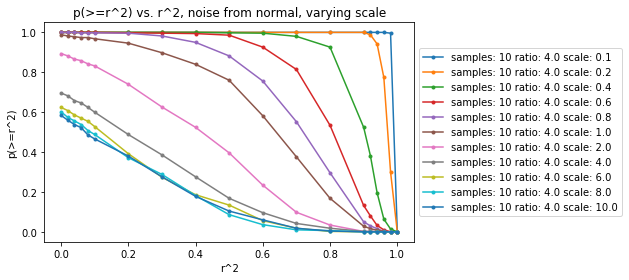

In [171]:
dist = 'normal'
i_sample = 7
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

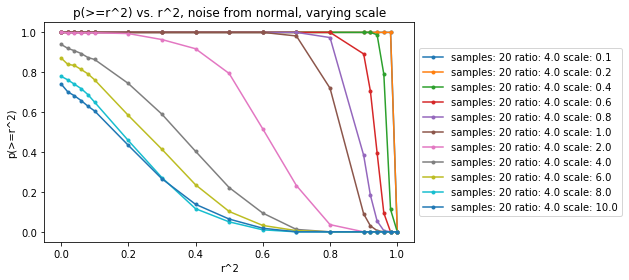

In [186]:
dist = 'normal'
i_sample = 12
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

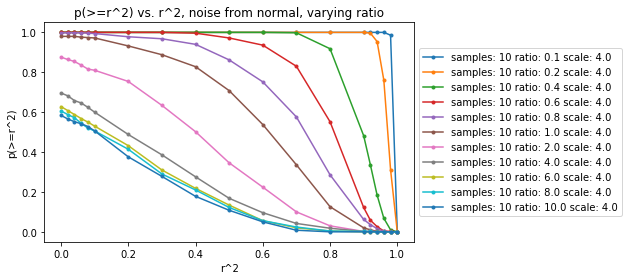

In [185]:
dist = 'normal'
i_sample = 7
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

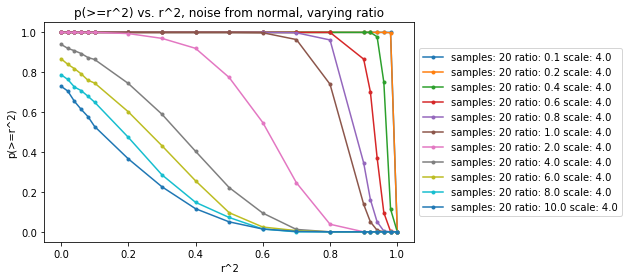

In [184]:
dist = 'normal'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

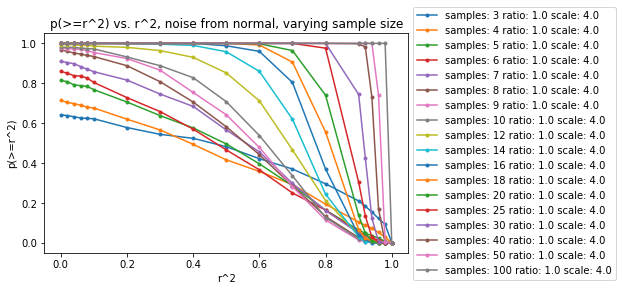

In [182]:
dist = 'normal'
# i_sample = 7
i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

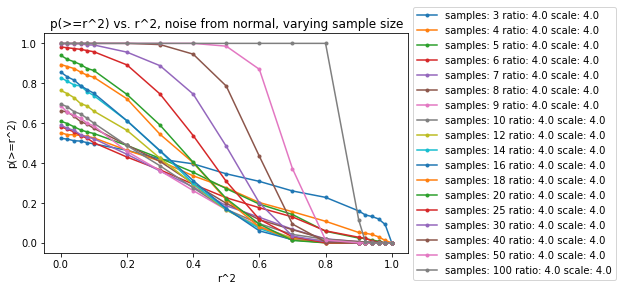

In [187]:
dist = 'normal'
# i_sample = 7
i_ratio = 7
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Plots - uniform
How does p(r^2 >= cutoff) vary with number of samples used to determine trendline, ratio of contribution from other variables to that from correlation, and scale (i.e., standard deviation of normal distribution or width of uniform distribution)?

## Varying scale

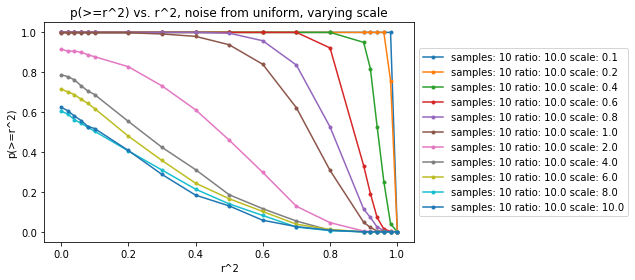

In [201]:
dist = 'uniform'
i_sample = 7
i_ratio = 10
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

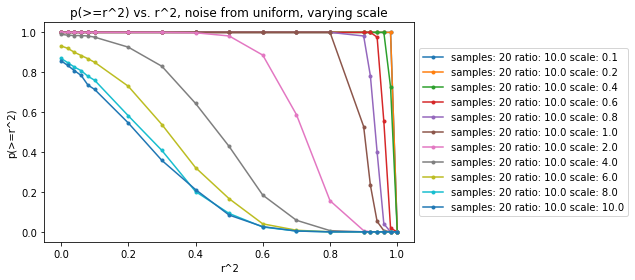

In [202]:
dist = 'uniform'
i_sample = 12
i_ratio = 10
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

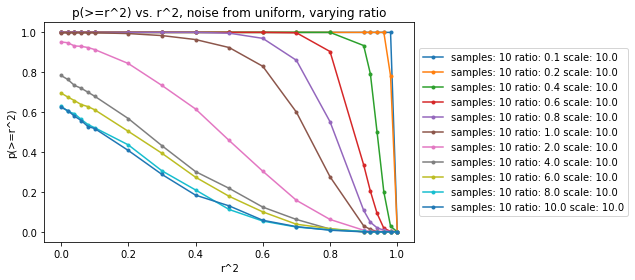

In [203]:
dist = 'uniform'
i_sample = 7
# i_ratio = 5
i_scale = 10
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

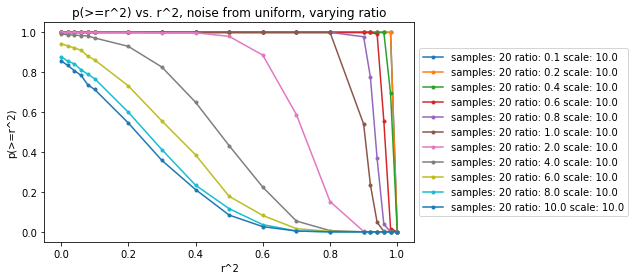

In [204]:
dist = 'uniform'
i_sample = 12
# i_ratio = 5
i_scale = 10
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

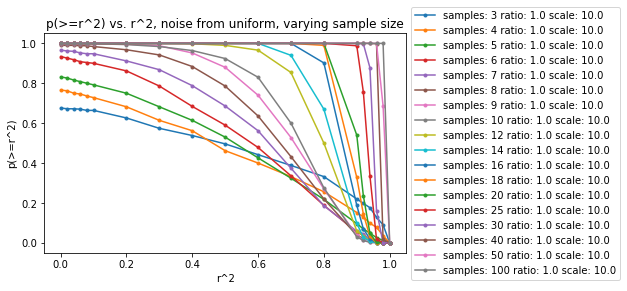

In [197]:
dist = 'uniform'
# i_sample = 7
i_ratio = 5
i_scale = 10
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

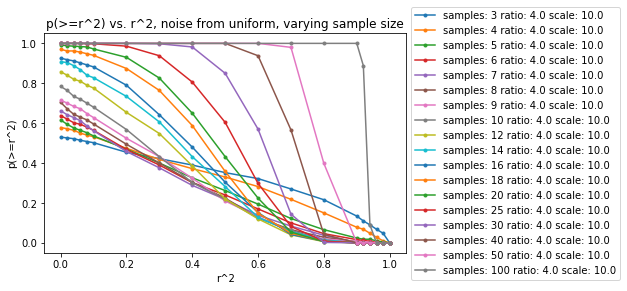

In [200]:
dist = 'uniform'
# i_sample = 7
i_ratio = 7
i_scale = 10
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Comments

<ul>
    <li>Above, only considering case noise is independent of x, and linear regression (modelling as y = mx + b) is used. So e.g., no b set to 0, and no higher-order modelling terms.</li>
    <li>Above, slope was 1. Below, it is 50. The plots look very much identical. Small differences seen where scale is hgh, ratio is high, or sample is low - i.e., differences only come in when you give the random noise a large opportunity to assert itself. The point is, the results being looked at are independent of the slope of y vs. x, so we can only consider the case where the slope is 1 WOLOG.</li>
    <li>Above, x-values in each data set were uniformly distributed. The results are altered in a nonobvious way if they are randomly distributed. E.g., below, I duplicated some of the above graphs, but drawing x from a bottom-heavy exponential distribution (i.e., low x values are more likely to be sampled than high x-values). Many of the p(>=r^2) values are altered as a result, though the overall trends are the same. The only thing that might be even a little bit robust against this is when scale or ratio is very low. Probably a high enough sample size would make data robust against this too, but even with 100 samples, data was not always robust against this. So, it seems that having a unevenly distributed sample set makes r^2 and p(>=r^2) less correlated. Should confirm this by reproducing the same p(>=r^2) vs. r^2 graphs multiple times, and seeing if they look similar to each other.</li>
    <li>You can get the uniform distribution curves to look a lot like the normal ones. For the same number of samples, just have a higher scale or higher ratio than for the uniform distribution than for the normal distribution.</li>
    <li>With this, easier to just focus on normally distributed noise - can ignore uniform for now.</li>
    <li>Curves are sigmoidal.
        <ul>
            <li>Their lower limit is 0 in all cases.</li>
            <li>Their upper limit cannot be greater than 1, but it is possible that it is a function of the variables (i.e., samples, ratio, and scale), and may or may not be able to have values between 0 and 1.</li>
            <li>Their center varies in x varies. It can be anywhere between 0 and 1.0, or on the outside of this domain.</li>
            <li>Their spread (i.e., how fast it goes from its upper to lower limit) varies as well, and need not be in the domain [0, 1].</li>
        </ul>
    </li>
    <li>Typically, if someone's looking for a correlation between two variables, the parameter of interest is ratio. So, the way that the above charts should be thought of is as follows:
        <ul>
            <li>We know our sample size (that should definitely be true).</li>
            <li>We know our scale (that is guesswork, unless we can do an experiment to extract it).</li>
            <li>We get a given r^2 value.</li>
            <li>We choose a threshold probability p(>=r^2) of getting our r^2 value or higher.</li>
            <li>Then, we have determined that our ratio is at or above where r^2 p(>=r^2) cross in the above graphs.</li>
            <li>Example: In the graph below, if we choose p(>=r^2) = 0.1 and our r^2 is 0.6, then our minimum ratio is somewhere almost exactly 4. This means our data comes from y = slope * (1 * x + (>=4) * noise) + b, i.e,. some 80% or more of our variation comes from noise rather than from varying x. Had we found a higher r^2 value, the red line would be shifted to the right, so ratio would be lower, so less of our variation would be attributable to noise, and more to variation in x.</li>
        </ul>
</ul>

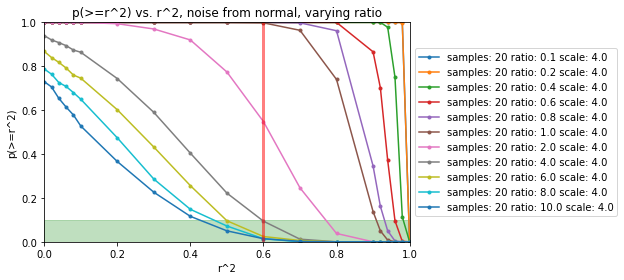

In [228]:
dist = 'normal'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.axvline(0.6, alpha=0.5, color='red', linewidth=3)
plt.axhspan(0.0, 0.1, alpha=0.25, color='green')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Let's see if slope makes a difference.
Above, slope was 1. Below, slope is 50.

In [229]:
probs_normal_2 = np.zeros((len(samples), len(ratios), len(scales), len(rsq_mins)))
probs_uniform_2 = np.zeros((len(samples), len(ratios), len(scales), len(rsq_mins)))

In [230]:
for dist in ['normal', 'uniform']:
    for i_sample in range(len(samples)):
        x = np.arange(samples[i_sample]) # note: x uniformly distributed for this investigation. If x randomly distributed, or distributed in a bottom- or top-heavy way, may alter results.
        for i_ratio in range(len(ratios)):
            print('samples: ' + str(i_sample + 1) + ' of ' + str(len(samples)) + ', ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios)))
            for i_scale in range(len(scales)):
                r_sqs = np.zeros(test_size)
                for i_test in range(len(r_sqs)):
                    y = lin_with_noise(x, slope=50, ratio=ratios[i_ratio], dist=dist, scale=scales[i_scale])
                    q = linregress(x, y)
                    r_sqs[i_test] = q.rvalue
                for i_rsq_min in range(len(rsq_mins)):
                    cutoff = (r_sqs >= rsq_mins[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                    cutoff_prob = np.sum(cutoff) / test_size
                    if dist == 'normal':
                        probs_normal_2[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    elif dist == 'uniform':
                        probs_uniform_2[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    else:
                        error('dist must be either \'normal\' or \'uniform\'.')


samples: 1 of 18, ratios: 1 of 11
samples: 1 of 18, ratios: 2 of 11
samples: 1 of 18, ratios: 3 of 11
samples: 1 of 18, ratios: 4 of 11
samples: 1 of 18, ratios: 5 of 11
samples: 1 of 18, ratios: 6 of 11
samples: 1 of 18, ratios: 7 of 11
samples: 1 of 18, ratios: 8 of 11
samples: 1 of 18, ratios: 9 of 11
samples: 1 of 18, ratios: 10 of 11
samples: 1 of 18, ratios: 11 of 11
samples: 2 of 18, ratios: 1 of 11
samples: 2 of 18, ratios: 2 of 11
samples: 2 of 18, ratios: 3 of 11
samples: 2 of 18, ratios: 4 of 11
samples: 2 of 18, ratios: 5 of 11
samples: 2 of 18, ratios: 6 of 11
samples: 2 of 18, ratios: 7 of 11
samples: 2 of 18, ratios: 8 of 11
samples: 2 of 18, ratios: 9 of 11
samples: 2 of 18, ratios: 10 of 11
samples: 2 of 18, ratios: 11 of 11
samples: 3 of 18, ratios: 1 of 11
samples: 3 of 18, ratios: 2 of 11
samples: 3 of 18, ratios: 3 of 11
samples: 3 of 18, ratios: 4 of 11
samples: 3 of 18, ratios: 5 of 11
samples: 3 of 18, ratios: 6 of 11
samples: 3 of 18, ratios: 7 of 11
samples: 3

## Varying scale

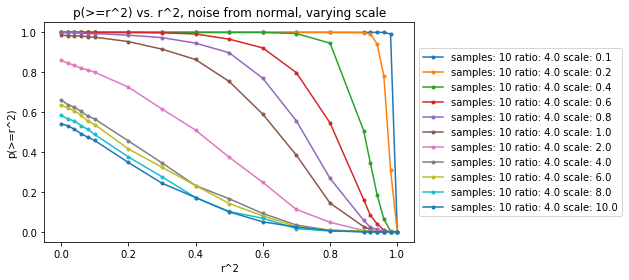

In [232]:
dist = 'normal'
i_sample = 7
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

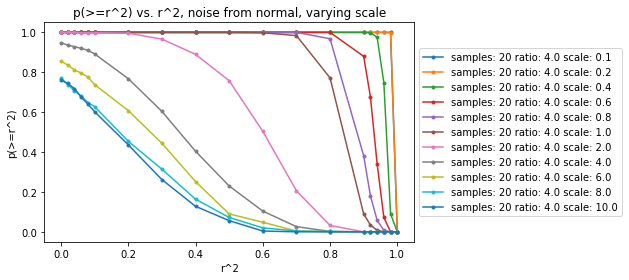

In [233]:
dist = 'normal'
i_sample = 12
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

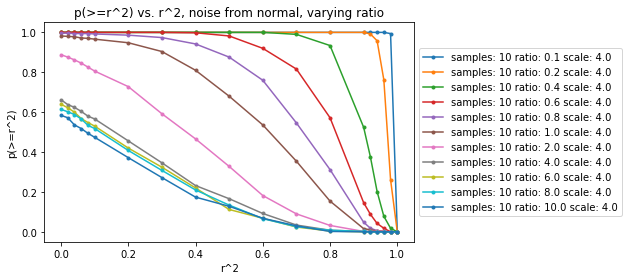

In [234]:
dist = 'normal'
i_sample = 7
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

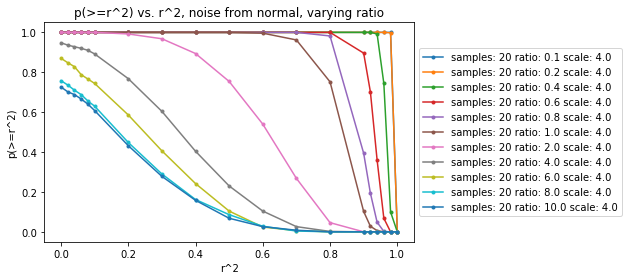

In [235]:
dist = 'normal'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

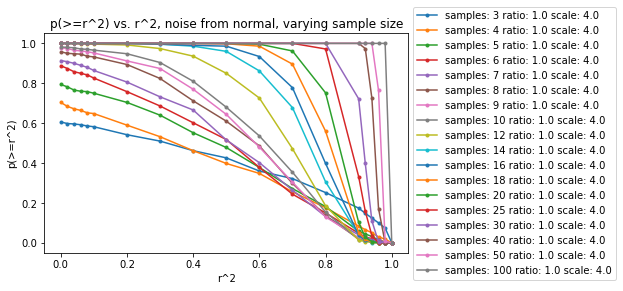

In [236]:
dist = 'normal'
# i_sample = 7
i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

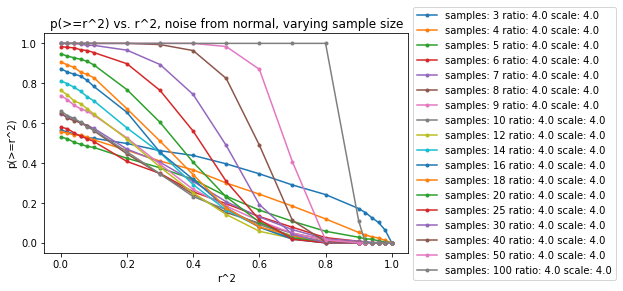

In [237]:
dist = 'normal'
# i_sample = 7
i_ratio = 7
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_2[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_2[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Let's see if distribution of sample points makes a difference.
Above, samples x were evenly distributed between 0 and (number of samples minus 1). Below, they are bottom-heavy, i.e., favor points toward 0 more than points toward (number of samples minus 1).

In [14]:
probs_normal_3 = np.zeros((len(samples), len(ratios), len(scales), len(rsq_mins)))
x_big = np.zeros(samples[len(samples) - 1])
while sum((1.0 * (x_big == 0))) > (samples[0] - 1):
    x_big = np.random.exponential(scale=4*samples[-1], size=samples[-1])

In [24]:
for dist in ['normal']:
    for i_sample in range(len(samples)):
        x = x_big[:samples[i_sample]]
        x = np.sort(x)
        x = x - np.min(x)
        x = samples[i_sample] * x / np.max(x)
        for i_ratio in range(len(ratios)):
            print('samples: ' + str(i_sample + 1) + ' of ' + str(len(samples)) + ', ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios)))
            for i_scale in range(len(scales)):
                r_sqs = np.zeros(test_size)
                for i_test in range(len(r_sqs)):
                    y = lin_with_noise(x, slope=50, ratio=ratios[i_ratio], dist=dist, scale=scales[i_scale])
                    q = linregress(x, y)
                    r_sqs[i_test] = q.rvalue
                for i_rsq_min in range(len(rsq_mins)):
                    cutoff = (r_sqs >= rsq_mins[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                    cutoff_prob = np.sum(cutoff) / test_size
                    if dist == 'normal':
                        probs_normal_3[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    elif dist == 'uniform':
                        probs_uniform_3[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    else:
                        error('dist must be either \'normal\' or \'uniform\'.')


samples: 1 of 18, ratios: 1 of 11
samples: 1 of 18, ratios: 2 of 11
samples: 1 of 18, ratios: 3 of 11
samples: 1 of 18, ratios: 4 of 11
samples: 1 of 18, ratios: 5 of 11
samples: 1 of 18, ratios: 6 of 11
samples: 1 of 18, ratios: 7 of 11
samples: 1 of 18, ratios: 8 of 11
samples: 1 of 18, ratios: 9 of 11
samples: 1 of 18, ratios: 10 of 11
samples: 1 of 18, ratios: 11 of 11
samples: 2 of 18, ratios: 1 of 11
samples: 2 of 18, ratios: 2 of 11
samples: 2 of 18, ratios: 3 of 11
samples: 2 of 18, ratios: 4 of 11
samples: 2 of 18, ratios: 5 of 11
samples: 2 of 18, ratios: 6 of 11
samples: 2 of 18, ratios: 7 of 11
samples: 2 of 18, ratios: 8 of 11
samples: 2 of 18, ratios: 9 of 11
samples: 2 of 18, ratios: 10 of 11
samples: 2 of 18, ratios: 11 of 11
samples: 3 of 18, ratios: 1 of 11
samples: 3 of 18, ratios: 2 of 11
samples: 3 of 18, ratios: 3 of 11
samples: 3 of 18, ratios: 4 of 11
samples: 3 of 18, ratios: 5 of 11
samples: 3 of 18, ratios: 6 of 11
samples: 3 of 18, ratios: 7 of 11
samples: 3

## Varying scale

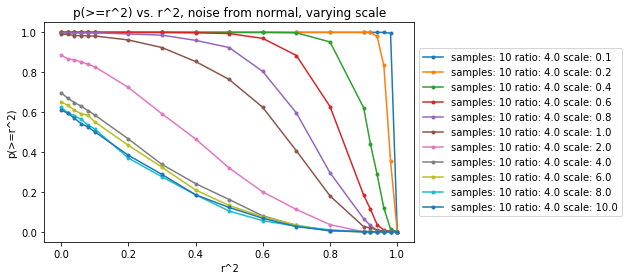

In [25]:
dist = 'normal'
i_sample = 7
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

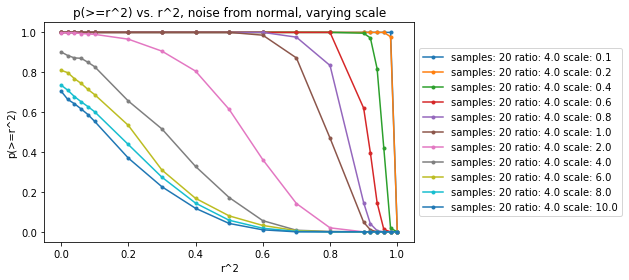

In [26]:
dist = 'normal'
i_sample = 12
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

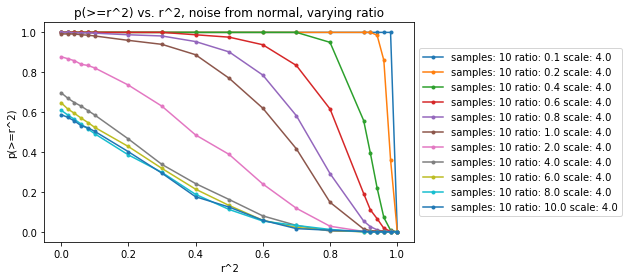

In [27]:
dist = 'normal'
i_sample = 7
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

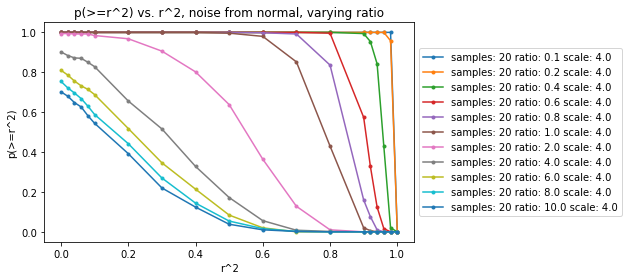

In [28]:
dist = 'normal'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

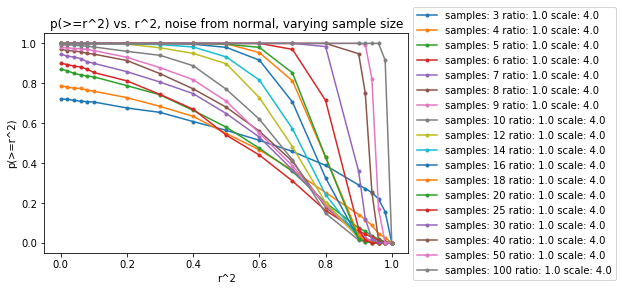

In [29]:
dist = 'normal'
# i_sample = 7
i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

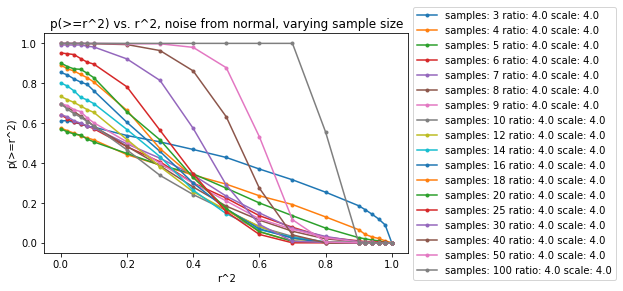

In [30]:
dist = 'normal'
# i_sample = 7
i_ratio = 7
i_scale = 7
labels = ['samples: ' + str(samples[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_3[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'uniform':
        plt.plot(rsq_mins, probs_uniform_3[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'uniform\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Thoughts

In [116]:
ind = 10
x_big_diff = np.diff(np.sort(x_big[:ind]))
most_uniform = np.diff(np.arange(len(x_big[:ind])))
changing_differences = np.arange(len(most_uniform))
print(x_big_diff)
print(entropy(x_big_diff))
print(most_uniform)
print(entropy(most_uniform))
print(changing_differences)
print(entropy(changing_differences))
#print(entropy(x_big, qk=np.arange(len(x_big))))
print(entropy([1, 1, 1, 1])) # anything but all 0s gives the same entropy.
print(entropy([1,2], qk=[0.5,0.5]))

print(np.exp(entropy([1])))
print(np.exp(entropy([1,1])))
print(np.exp(entropy([1,1,1])))
print(np.exp(entropy([1,0.0,1.0])))

[  1.07871242e+02   2.65143327e-01   8.47152708e+00   7.61630441e+01
   6.62749268e+01   1.38736223e+02   2.72172062e+02   2.25057562e+02
   4.66115687e+02]
1.76184891679
[1 1 1 1 1 1 1 1 1]
2.19722457734
[0 1 2 3 4 5 6 7 8]
1.93679787107
1.38629436112
0.0566330122651
1.0
2.0
3.0
2.0


One thing that might be going on with different distributions is simply that your sample size is effectively less. How much less? Shannan entropy much less, with the differences between the sorted x-values treated as probabilities. Can test for this easily - repeat each point twice for a given sample size, and your effective sample size is halved. But, if something like Poisson stats applies, your standard deviation has also gone down by sqrt(2). Instead, repeat each point 4 times. Now we have samples -> sample / 4, sigma -> sigma / 2, so e.g., the graph for sample=100 scale=4.0 should look like that for sample=25 scale=2.0.

Looked at whether curve for sample, scale = curve for sample x 4, scale x 2 - it doesn't, so that sort of Poisson relation doesn't hold here. The entropy thing still might though, if entropy affects sample without affecting scale.

## Entropy test
Changing the distribution of sample points x seems to have an unpredictable effect. One possibility, though, is that what matters is the evenness of the distribution of sample points, i.e., how even np.diff(x) is. One measure of this is Shannon entropy. Below, testing: if we decrease evenness of distribution by half (these are the data in probs_normal_4_repeating below), does this have the same effect as decreasing the sample size by half without decreasing the evenness (these are the data points in probs_normal_4)?

The hypothesis doesn't hold up - the graphs of p(>=r^2) vs. r^2 for look the same for the same ratio and sample size, regardless to entropy. So, the effects seen above while using bottom-heavy distributions aren't explained away in this manner.

In [52]:
samples_2 = np.array([3, 4, 5, 6, 7, 8, 9,\
          11, 13, 15, 17, 19,\
          21, 25, 31, 41, 51,\
          101])

probs_normal_4 = np.zeros((len(samples_2), len(ratios), len(scales), len(rsq_mins)))
probs_normal_4_repeating = np.zeros((len(samples_2), len(ratios), len(scales), len(rsq_mins)))

i_sample_1 = 12
i_sample_2 = 15
x_1a = np.arange(samples_2[i_sample_1]) # 41 samples, repeating
x_1b = np.array([x_1a[item] - 1 if item % 2 == 1 else x_1a[item] for item in range(len(x_1a))])
x_2a = np.arange(samples_2[i_sample_2])
x_2b = np.array([x_2a[item] - 1 if item % 2 == 1 else x_2a[item] for item in range(len(x_2a))]) # 21 samples, non-repeating

# samples_2 with 2n+1 repeating x's has the same entropy as samples_2  with n+1 non-repeating x's
print(samples_2[i_sample_1])
print(samples_2[i_sample_2])
print(x_1a)
print(x_2b)
print(np.exp(entropy(np.diff(x_1a))))
print(np.exp(entropy(np.diff(x_2b))))

21
41
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  0  2  2  4  4  6  6  8  8 10 10 12 12 14 14 16 16 18 18 20 20 22 22 24
 24 26 26 28 28 30 30 32 32 34 34 36 36 38 38 40]
20.0
20.0


In [55]:
for dist in ['normal', 'normal_repeating']:
    for i_sample in range(len(samples_2)):
        if dist == 'normal':
            x = np.arange(samples_2[i_sample])
        elif dist == 'normal_repeating':
            x = np.arange(samples_2[i_sample])
            x = np.array([x[item] - 1 if item % 2 == 1 else x[item] for item in range(len(x))])
        else:
            error('dist must be either \'normal\' or \'normal_repeating\'.')
        for i_ratio in range(len(ratios)):
            print('samples: ' + str(i_sample + 1) + ' of ' + str(len(samples_2)) + ', ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios)))
            for i_scale in range(len(scales)):
                r_sqs = np.zeros(test_size)
                for i_test in range(len(r_sqs)):
                    y = lin_with_noise(x, slope=50, ratio=ratios[i_ratio], dist='normal', scale=scales[i_scale])
                    q = linregress(x, y)
                    r_sqs[i_test] = q.rvalue
                for i_rsq_min in range(len(rsq_mins)):
                    cutoff = (r_sqs >= rsq_mins[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                    cutoff_prob = np.sum(cutoff) / test_size
                    if dist == 'normal':
                        probs_normal_4[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    elif dist == 'normal_repeating':
                        probs_normal_4_repeating[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob
                    else:
                        error('dist must be either \'normal\' or \'normal_repeating\'.')


samples: 1 of 18, ratios: 1 of 11
samples: 1 of 18, ratios: 2 of 11
samples: 1 of 18, ratios: 3 of 11
samples: 1 of 18, ratios: 4 of 11
samples: 1 of 18, ratios: 5 of 11
samples: 1 of 18, ratios: 6 of 11
samples: 1 of 18, ratios: 7 of 11
samples: 1 of 18, ratios: 8 of 11
samples: 1 of 18, ratios: 9 of 11
samples: 1 of 18, ratios: 10 of 11
samples: 1 of 18, ratios: 11 of 11
samples: 2 of 18, ratios: 1 of 11
samples: 2 of 18, ratios: 2 of 11
samples: 2 of 18, ratios: 3 of 11
samples: 2 of 18, ratios: 4 of 11
samples: 2 of 18, ratios: 5 of 11
samples: 2 of 18, ratios: 6 of 11
samples: 2 of 18, ratios: 7 of 11
samples: 2 of 18, ratios: 8 of 11
samples: 2 of 18, ratios: 9 of 11
samples: 2 of 18, ratios: 10 of 11
samples: 2 of 18, ratios: 11 of 11
samples: 3 of 18, ratios: 1 of 11
samples: 3 of 18, ratios: 2 of 11
samples: 3 of 18, ratios: 3 of 11
samples: 3 of 18, ratios: 4 of 11
samples: 3 of 18, ratios: 5 of 11
samples: 3 of 18, ratios: 6 of 11
samples: 3 of 18, ratios: 7 of 11
samples: 3

## Normal

## Varying scale

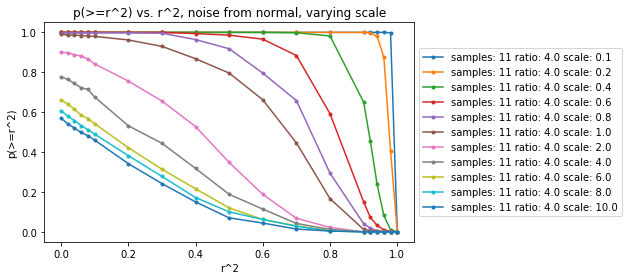

In [65]:
dist = 'normal'
i_sample = 7
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

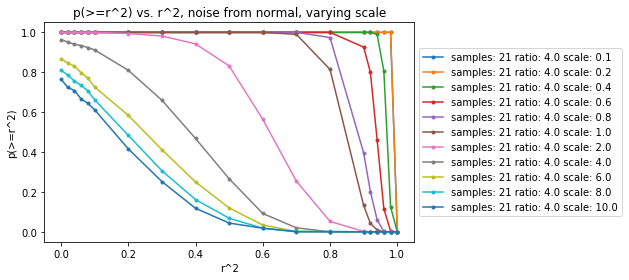

In [66]:
dist = 'normal'
i_sample = 12
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

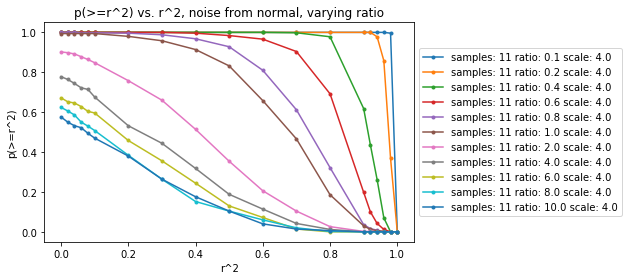

In [67]:
dist = 'normal'
i_sample = 7
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

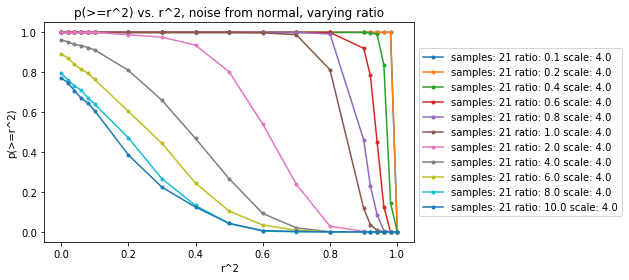

In [68]:
dist = 'normal'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

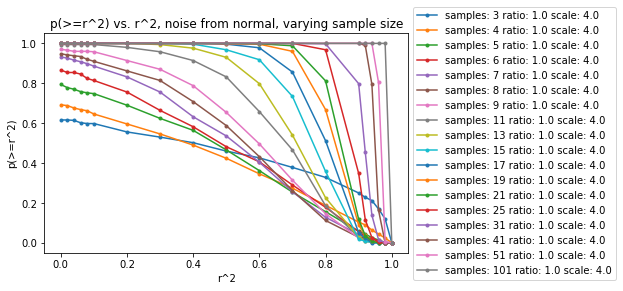

In [69]:
dist = 'normal'
# i_sample = 7
i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples_2)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

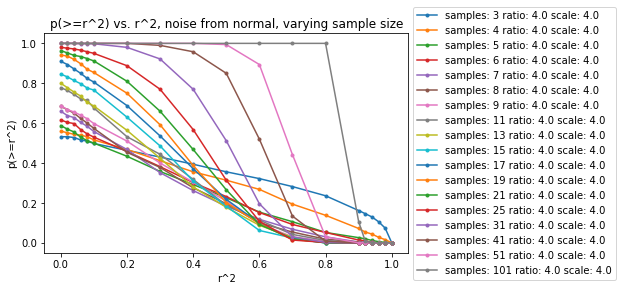

In [70]:
dist = 'normal'
# i_sample = 7
i_ratio = 7
i_scale = 7
labels = ['samples: ' + str(samples_2[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples_2)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Normal repeating

## Varying scale

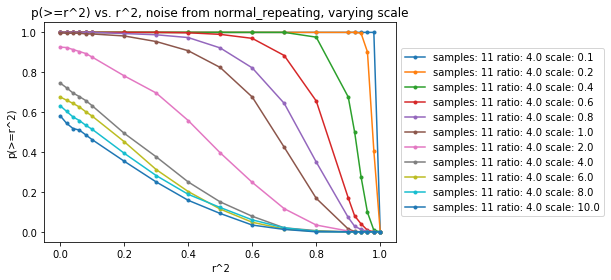

In [71]:
dist = 'normal_repeating'
i_sample = 7
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

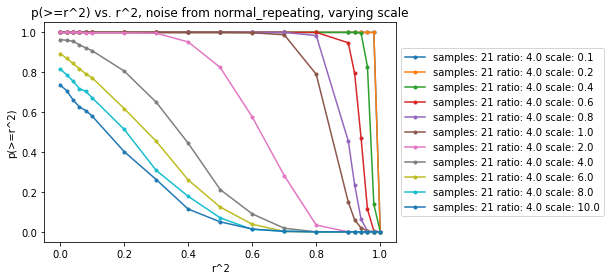

In [72]:
dist = 'normal_repeating'
i_sample = 12
i_ratio = 7
# i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[item]) for item in range(len(scales))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying scale')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_scale in range(len(scales)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying ratio

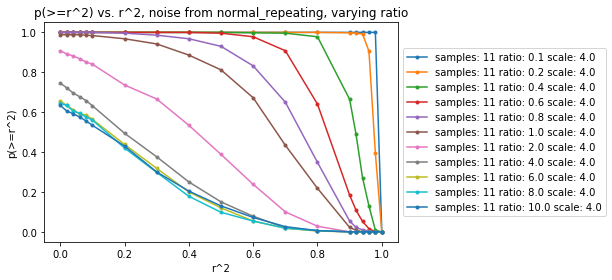

In [73]:
dist = 'normal_repeating'
i_sample = 7
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

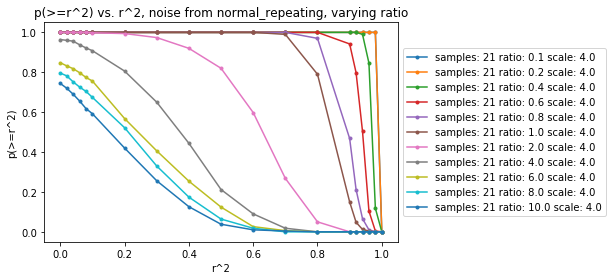

In [74]:
dist = 'normal_repeating'
i_sample = 12
# i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[i_sample]) + ' ratio: ' + str(ratios[item]) + ' scale: ' + str(scales[i_scale]) for item in range(len(ratios))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Varying samples

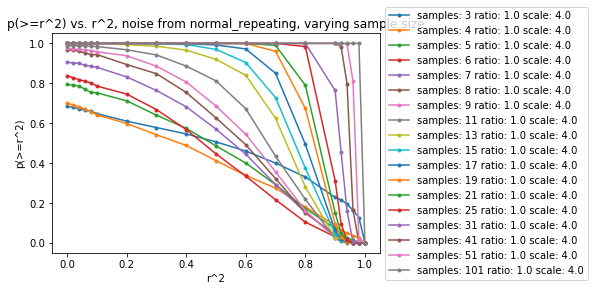

In [75]:
dist = 'normal_repeating'
# i_sample = 7
i_ratio = 5
i_scale = 7
labels = ['samples: ' + str(samples_2[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples_2)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

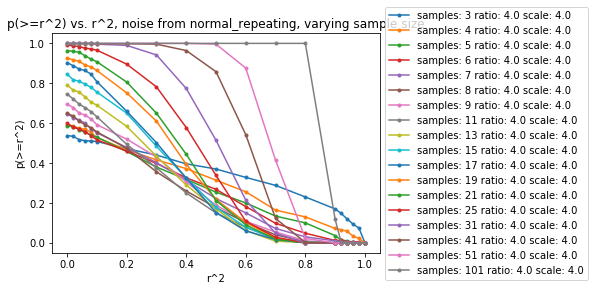

In [76]:
dist = 'normal_repeating'
# i_sample = 7
i_ratio = 7
i_scale = 7
labels = ['samples: ' + str(samples_2[item]) + ' ratio: ' + str(ratios[i_ratio]) + ' scale: ' + str(scales[i_scale]) for item in range(len(samples))]

plt.title('p(>=r^2) vs. r^2, noise from ' + dist + ', varying sample size')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_sample in range(len(samples_2)):
    if dist == 'normal':
        plt.plot(rsq_mins, probs_normal_4[i_sample, i_ratio, i_scale, :], '.-')
    elif dist == 'normal_repeating':
        plt.plot(rsq_mins, probs_normal_4_repeating[i_sample, i_ratio, i_scale, :], '.-')
    else:
        error('dist must be either \'normal\' or \'normal_repeating\'.')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Use case: looking at ovl vs CDIS

See spreadsheet in this folder for where the values in the next cell were attained.

A typical r^2 of of ovl vs. CDIS is ovm3s.ox at r=0mm-140mm vs. CDIS avg at r=0mm-140mm. For this:

r^2 = 0.65.

The standard deviation for this is measured at:

scale_raw = 3.33e-10 m. (on scale where y_min and y_max are whatever they are). Found by taking each std, and averaging over all of the std's.

scale_norm = 0.403713692492366 (on normalized scale, where y_min = 0 and y_max = 1). Found by taking each std, dividing by (y_max - y_min) of values over which it was found, and averaging over all of the std's.

The sample size is:

sample = 16.

The x values are:

[187.5417, 266.9583, 278.5, 274.2917, 182.7917, 135, 328, 383.2917, 190.5, 116.7083, 152.0833, 129.2083, 207.0833, 263.5833, 369.2917, 387.2917]

In [116]:
x_raw = np.array([187.5417, 266.9583, 278.5, 274.2917,\
                  182.7917, 135, 328, 383.2917, 190.5,\
                  116.7083, 152.0833, 129.2083,\
                  207.0833, 263.5833, 369.2917, 387.2917])
print(x_raw)

[ 187.5417  266.9583  278.5     274.2917  182.7917  135.      328.
  383.2917  190.5     116.7083  152.0833  129.2083  207.0833  263.5833
  369.2917  387.2917]


In [117]:
x = np.sort(x_raw)
x = x - np.min(x)
x = x / np.max(x)
print(x)
print(len(x))
x_entropic = np.arange(len(x))
x_entropic = x_entropic / np.max(x_entropic)
print(x_entropic)

print(np.exp(entropy(np.diff(x_entropic))))
print(np.exp(entropy(np.diff(x))))

[ 0.          0.04619648  0.06760097  0.13073603  0.24422563  0.26178029
  0.27271333  0.33400053  0.54280861  0.55528166  0.58238384  0.59793653
  0.78087458  0.93347707  0.98521713  1.        ]
16
[ 0.          0.06666667  0.13333333  0.2         0.26666667  0.33333333
  0.4         0.46666667  0.53333333  0.6         0.66666667  0.73333333
  0.8         0.86666667  0.93333333  1.        ]
15.0
9.92045747267


In [141]:
samples_data = np.array([16])
ratios_data = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
scales_data = np.array([0.403713692492366 * (item - 1) for item in samples_data])

rsq_mins_data = np.array([0.0, 0.05, 0.1, 0.15,\
                          0.2, 0.25, 0.3, 0.35,\
                          0.4, 0.45, 0.5, 0.55,\
                          0.6, 0.65, 0.7, 0.75,\
                          0.8, 0.85, 0.9, 0.95,\
                          1])

probs_data = np.zeros((len(samples_data), len(ratios_data), len(scales_data), len(rsq_mins_data)))

test_size_data = 5000

print(test_size_data, np.shape(probs_data))
print(test_size_data * np.prod(np.shape(probs_data)))

5000 (1, 9, 1, 21)
945000


In [148]:
x = np.sort(x_raw)
x = x - np.min(x)
x = (len(x) - 1) * x / np.max(x)
print(x)

[  0.           0.69294717   1.01401453   1.96104048   3.66338438
   3.9267043    4.09069995   5.010008     8.14212919   8.32922493
   8.73575763   8.96904799  11.71311876  14.00215608  14.77825691  15.        ]


In [151]:
for i_sample in range(len(samples_data)):
    # x = np.arange(samples[i_sample])
    x = np.sort(x_raw)
    x = x - np.min(x)
    x = (len(x) - 1) * x / np.max(x) # if sample points are perfectly uniformly distributed in x, this is np.arange(0,len(x_raw))
    for i_ratio in range(len(ratios_data)):
        print('ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios_data)))
        for i_scale in range(len(scales_data)):
            r_sqs = np.zeros(test_size_data)
            for i_test in range(len(r_sqs)):
                y = lin_with_noise(x, slope=1, ratio=ratios_data[i_ratio], dist='normal', scale=scales_data[i_scale])
                q = linregress(x, y)
                r_sqs[i_test] = q.rvalue
            for i_rsq_min in range(len(rsq_mins_data)):
                cutoff = (r_sqs >= rsq_mins_data[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                cutoff_prob = np.sum(cutoff) / test_size_data
                probs_data[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob

ratios: 1 of 9
ratios: 2 of 9
ratios: 3 of 9
ratios: 4 of 9
ratios: 5 of 9
ratios: 6 of 9
ratios: 7 of 9
ratios: 8 of 9
ratios: 9 of 9


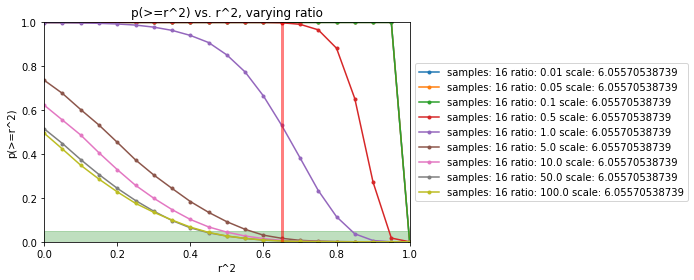

In [158]:
i_sample = 0
# i_ratio = 5
i_scale = 0
labels = ['samples: ' + str(samples_data[i_sample]) + ' ratio: ' + str(ratios_data[item]) + ' scale: ' + str(scales_data[i_scale]) for item in range(len(ratios_data))]

plt.title('p(>=r^2) vs. r^2, varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios_data)):
    plt.plot(rsq_mins_data, probs_data[i_sample, i_ratio, i_scale, :], '.-')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

r2_data = 0.65
p_value = 0.05
plt.axvline(r2_data, alpha=0.5, color='red', linewidth=3)
plt.axhspan(0.0, p_value, alpha=0.25, color='green')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()

In [160]:
ratios_data_refined = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
probs_data_refined = np.zeros((len(samples_data), len(ratios_data_refined), len(scales_data), len(rsq_mins_data)))

In [161]:
for i_sample in range(len(samples_data)):
    # x = np.arange(samples[i_sample])
    x = np.sort(x_raw)
    x = x - np.min(x)
    x = (len(x) - 1) * x / np.max(x) # if sample points are perfectly uniformly distributed in x, this is np.arange(0,len(x_raw))
    for i_ratio in range(len(ratios_data_refined)):
        print('ratios: ' + str(i_ratio + 1) + ' of ' + str(len(ratios_data_refined)))
        for i_scale in range(len(scales_data)):
            r_sqs = np.zeros(test_size_data)
            for i_test in range(len(r_sqs)):
                y = lin_with_noise(x, slope=1, ratio=ratios_data_refined[i_ratio], dist='normal', scale=scales_data[i_scale])
                q = linregress(x, y)
                r_sqs[i_test] = q.rvalue
            for i_rsq_min in range(len(rsq_mins_data)):
                cutoff = (r_sqs >= rsq_mins_data[i_rsq_min]) * 1.0 # * 1.0 for conversion from logical to float
                cutoff_prob = np.sum(cutoff) / test_size_data
                probs_data_refined[i_sample, i_ratio, i_scale, i_rsq_min] = cutoff_prob

ratios: 1 of 9
ratios: 2 of 9
ratios: 3 of 9
ratios: 4 of 9
ratios: 5 of 9
ratios: 6 of 9
ratios: 7 of 9
ratios: 8 of 9
ratios: 9 of 9


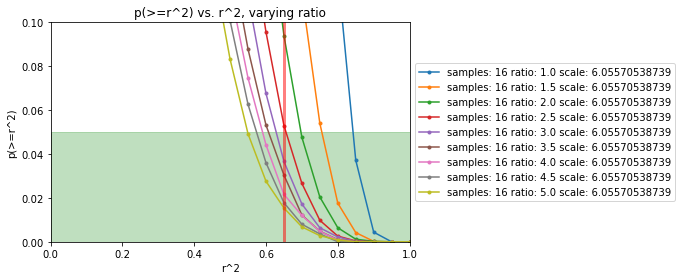

In [163]:
i_sample = 0
# i_ratio = 5
i_scale = 0
labels = ['samples: ' + str(samples_data[i_sample]) + ' ratio: ' + str(ratios_data_refined[item]) + ' scale: ' + str(scales_data[i_scale]) for item in range(len(ratios_data_refined))]

plt.title('p(>=r^2) vs. r^2, varying ratio')
plt.xlabel('r^2')
plt.ylabel('p(>=r^2)')
for i_ratio in range(len(ratios_data_refined)):
    plt.plot(rsq_mins_data, probs_data_refined[i_sample, i_ratio, i_scale, :], '.-')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

r2_data = 0.65
p_value = 0.05
plt.axvline(r2_data, alpha=0.5, color='red', linewidth=3)
plt.axhspan(0.0, p_value, alpha=0.25, color='green')
plt.xlim(0, 1)
plt.ylim(0, 0.1)
plt.tight_layout()

In [164]:
1 / (2.5 + 1)

0.2857142857142857

## Conclusion
Based on the data, we can say with about 95% confidence that our r^2 value of about 0.65 suggest that ratio is <= about 2.5, i.e., that 1 / (2.5 + 1) = 2 / 7 = 0.286 of our variance in ox.m3s r=0-140mm comes from varying our burl roughness.